Anthony Wilson <br>
DSC 550 Awilson Final project<br>
EDA 

In [2]:
import numpy as np
import pandas as pd
import sqlite3

In [3]:
# calling sqlite database and pulling dat for Hockey events 
con = sqlite3.connect('dsc_550_project.sqlite') 
cursor = con.execute('Select * from DIM_EVENT_TABLE')
rows = cursor.fetchall()
# pulling columns for dataframe
column_headers = list(map(lambda x: x[0], cursor.description))
df_events = pd.DataFrame(rows, columns =column_headers)
df_events.head()

,id,event,period,periodType,periodTime,dateTime,home,away,description,x,y,eventTeam,playerid1,playerType1,playerid2,playerType2,playerid3,playerType3,playerid4,playerType4
0,20140100770,Game Scheduled,1,REGULAR,00:00,2014-10-01T21:15:40Z,0,0,Game Scheduled,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None
1,20140100771,Period Ready,1,REGULAR,00:00,2014-10-01T22:53:59Z,0,0,Period Ready,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None
2,20140100772,Period Start,1,REGULAR,00:00,2014-10-01T23:07:19Z,0,0,Period Start,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None
3,20140100773,Faceoff,1,REGULAR,00:00,2014-10-01T23:07:19Z,0,0,Tyler Ennis faceoff won against Andre Burakovsky,0.0,0.0,7.0,8474589.0,Winner,8477444.0,Loser,NaN,None,NaN,None
4,20140100774,Hit,1,REGULAR,00:15,2014-10-01T23:08:22Z,0,0,Brooks Laich hit Tyler Myers,-74.0,-40.0,15.0,8469639.0,Hitter,8474574.0,Hittee,NaN,None,NaN,None


In [4]:
# calling season and game infromation
cursor = con.execute('Select * from DIM_SEASON_TABLE')
rows = cursor.fetchall()
column_headers = list(map(lambda x: x[0], cursor.description))
df_games = pd.DataFrame(rows, columns =column_headers)
df_games.head()

,id,link,season,gameDate,gameType,awayTeamId,homeTeamId
0,2014010077,/api/v1/game/2014010077/feed/live,20142015,2014-10-01T23:00:00Z,01,15,7
1,2014010079,/api/v1/game/2014010079/feed/live,20142015,2014-10-01T23:00:00Z,01,12,29
2,2014010081,/api/v1/game/2014010081/feed/live,20142015,2014-10-01T23:30:00Z,01,5,17
3,2014010078,/api/v1/game/2014010078/feed/live,20142015,2014-10-02T00:30:00Z,01,8,16
4,2014010080,/api/v1/game/2014010080/feed/live,20142015,2014-10-02T01:00:00Z,01,53,22


In [5]:
# No need to pull in preseaon games not a lot of effort is given
df_games = df_games[df_games.gameType != '01']
df_games.head()

,id,link,season,gameDate,gameType,awayTeamId,homeTeamId
29,2014020001,/api/v1/game/2014020001/feed/live,20142015,2014-10-08T23:00:00Z,02,8,10
30,2014020002,/api/v1/game/2014020002/feed/live,20142015,2014-10-08T23:30:00Z,02,4,6
31,2014020004,/api/v1/game/2014020004/feed/live,20142015,2014-10-09T02:00:00Z,02,28,26
32,2014020003,/api/v1/game/2014020003/feed/live,20142015,2014-10-09T02:00:00Z,02,23,20
33,2014020005,/api/v1/game/2014020005/feed/live,20142015,2014-10-09T23:00:00Z,02,29,7


In [6]:
# the id is setup with the game id plus the event id creating another id gameId which ties back to the game without the event
df_events['gameId'] = [int(x[0:10]) for x in df_events.id.values.astype(str)]
df_events.head()

,id,event,period,periodType,periodTime,dateTime,home,away,description,x,...,eventTeam,playerid1,playerType1,playerid2,playerType2,playerid3,playerType3,playerid4,playerType4,gameId
0,20140100770,Game Scheduled,1,REGULAR,00:00,2014-10-01T21:15:40Z,0,0,Game Scheduled,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014010077
1,20140100771,Period Ready,1,REGULAR,00:00,2014-10-01T22:53:59Z,0,0,Period Ready,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014010077
2,20140100772,Period Start,1,REGULAR,00:00,2014-10-01T23:07:19Z,0,0,Period Start,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014010077
3,20140100773,Faceoff,1,REGULAR,00:00,2014-10-01T23:07:19Z,0,0,Tyler Ennis faceoff won against Andre Burakovsky,0.0,...,7.0,8474589.0,Winner,8477444.0,Loser,NaN,None,NaN,None,2014010077
4,20140100774,Hit,1,REGULAR,00:15,2014-10-01T23:08:22Z,0,0,Brooks Laich hit Tyler Myers,-74.0,...,15.0,8469639.0,Hitter,8474574.0,Hittee,NaN,None,NaN,None,2014010077


In [7]:
# validating new gameId to see if it only pulls in the specific game
df_events[(df_events.gameId == df_games.iloc[0].id)]

,id,event,period,periodType,periodTime,dateTime,home,away,description,x,...,eventTeam,playerid1,playerType1,playerid2,playerType2,playerid3,playerType3,playerid4,playerType4,gameId
7577,20140200010,Game Scheduled,1,REGULAR,00:00,2014-10-08T22:15:54Z,0,0,Game Scheduled,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014020001
7578,20140200011,Period Ready,1,REGULAR,00:00,2014-10-08T23:15:58Z,0,0,Period Ready,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014020001
7579,20140200012,Period Start,1,REGULAR,00:00,2014-10-08T23:15:59Z,0,0,Period Start,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014020001
7580,20140200013,Faceoff,1,REGULAR,00:00,2014-10-08T23:15:59Z,0,0,David Desharnais faceoff won against Tyler Bozak,0.0,...,8.0,8471976.0,Winner,8475098.0,Loser,NaN,None,NaN,None,2014020001
7581,20140200014,Missed Shot,1,REGULAR,00:19,2014-10-08T23:24:43Z,0,0,David Desharnais - Wide of Net,61.0,...,8.0,8471976.0,Shooter,NaN,None,NaN,None,NaN,None,2014020001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,2014020001341,Shot,3,REGULAR,19:41,2014-10-09T01:54:46Z,3,4,Phil Kessel Wrist Shot saved by Carey Price,-81.0,...,10.0,8473548.0,Shooter,8471679.0,Goalie,NaN,None,NaN,None,2014020001
7919,2014020001342,Blocked Shot,3,REGULAR,19:51,2014-10-09T01:54:57Z,3,4,Dion Phaneuf blocked shot from Dale Weise,79.0,...,10.0,8470602.0,Blocker,8474668.0,Shooter,NaN,None,NaN,None,2014020001
7920,2014020001343,Period End,3,REGULAR,20:00,2014-10-09T01:55:17Z,3,4,End of 3rd Period,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014020001
7921,2014020001344,Period Official,3,REGULAR,20:00,2014-10-09T01:55:18Z,3,4,Period Official,NaN,...,NaN,NaN,None,NaN,None,NaN,None,NaN,None,2014020001


In [8]:
def getGamePivot(gameId, df_events):
    """
    getGamePivot:
    When a gameId is passed, a new table is created from the df_events dataframe. 
    The event column is then transposed from tall to wide, so each value gets its 
    own columns. You will see Shot, Goal, Hit, etc... from the df_events table. It 
    will then return the pivoted game data.
    """
    game =  df_events[(df_events['gameId'] == gameId)][['id','gameId','period', 'event', 'dateTime','eventTeam', 'playerType1']]
    gamePivot = game.pivot_table(index = ['id','gameId', 'period', 'dateTime'], columns = 'event' , values = 'eventTeam').fillna(0)
    return gamePivot

In [9]:
def getTeam(teams, teamid):
    """
    getTeam:
    Get teamid when passed from list of teams.
    """
    if teams[teams==teamid].index[0]:
        value = teams[teams==teamid].index[0]
    return value

In [10]:
def getGameSummary(gameInfo, df_events): 
    """
    getGameSummary:
    General game information is passed along with the df_events. A dictionary is 
    created for both home and away teams so that we have one row for each team 
    and game. A summary is created by pulling each pivoted column and determning 
    which team was first, with a first flag for each event type. Total number event 
    for each team will be stored as well. The final score will also  be stored. Then 
    both the home and away dictionaries will be combined and returned.
    """
    home_dict = {}
    away_dict = {}
    gameSummary = {}
    
    # Get the game data and transpose the columns
    gamePivot = getGamePivot(gameInfo.id, df_events)
    
    # Set home/away team id's
    home = gameInfo.homeTeamId
    away = gameInfo.awayTeamId
    
    # Zip game index and gameInfo to loop through general game info
    gameData = list(zip(gameInfo.index,gameInfo))
    
    # Set game data for initial columns, gameid, home and away teams and the start time
    for col, value in gameData[:4]:
        if col == 'id': 
            col = 'gameId'
        home_dict[col] = value
        away_dict[col] = value 
        
    # If there is not event data skip this step 
    if len(gamePivot) > 0:      
        
        # Put a flag in for the home team
        home_dict['teamId'] = home
        home_dict['isHome'] = 1
        away_dict['teamId'] = away       
        away_dict['isHome'] = 0

        # loop through game pivot dataframe and pull first events and sum totals
        for col in gamePivot.columns:
            h_value = 0
            a_value = 0  
            # Drop spaces and put in a underscore, so columns are easier to work with
            colNew = col.replace(' ', '_') 

            # Create dictionary of the sum of an event so that if we are missing data
            # we still capture a 0 based on the h_values and a_values.
            colDict = dict(gamePivot[gamePivot[col] > 0][col].value_counts()) 

            # Loop through dictionary and return values if they exist
            for k,v in colDict.items():
                if k == home:
                    h_value = v
                elif k == away: 
                    a_value = v

            # Set values        
            home_dict[colNew] = h_value
            away_dict[colNew] = a_value

            # Pull first team based on given event
            teamCol = gamePivot.loc[min(gamePivot[gamePivot[col] > 0].index)][col]

            #Set isFirst_"column"
            if teamCol == home:
                home_dict['isFirst_' + colNew] = 1
                away_dict['isFirst_' + colNew] = 0 

            elif teamCol == away:             
                home_dict['isFirst_' + colNew] = 0 
                away_dict['isFirst_' + colNew] = 1
            # If niether happens assign a zero
            else: 
                home_dict['isFirst_' + colNew] = 0 
                away_dict['isFirst_' + colNew] = 0

        # Set flag for whether team was able to win the game      
        if home_dict['Goal'] > away_dict['Goal']:
            home_dict['win'] = 1
            away_dict['win'] = 0
        elif home_dict['Goal'] < away_dict['Goal']: 
            home_dict['win'] = 0
            away_dict['win'] = 1
        else: 
            home_dict['win'] = 0
            away_dict['win'] = 0
    else:
        #  Identify missing data so we can remove from the analysis
        home_dict['win'] = -1
        away_dict['win'] = -1
        
    # Combine two dictionaries into one and return
    _id_ =  int(str(gameInfo.id) + str(home))
    gameSummary[_id_] = home_dict
    _id_ =  int(str(gameInfo.id) + str(away))
    gameSummary[_id_] = away_dict
    return gameSummary

In [11]:
# Pulling all game summaries
gameSummary = {}
# Identify games that don't have event data
badData = []
for i in range(len(df_games)):
    # If no event data is returned throw excption, but add these to the badData based on index
    try: 
        # Pull basic game information
        gameInfo = df_games.iloc[i]
        # Pull game summary and add to game_summary 
        gameSummary.update(getGameSummary(gameInfo, df_events))
    except:
        badData.append(i)
# Create dataframe of all gameStats returned
gameStats = pd.DataFrame.from_dict(gameSummary, orient = 'index')
gameStats.head()

,gameId,link,season,gameDate,teamId,isHome,Blocked_Shot,isFirst_Blocked_Shot,Faceoff,isFirst_Faceoff,...,isFirst_Missed_Shot,Penalty,isFirst_Penalty,Shot,isFirst_Shot,Takeaway,isFirst_Takeaway,win,Official_Challenge,isFirst_Official_Challenge
201402000110,2014020001,/api/v1/game/2014020001/feed/live,20142015,2014-10-08T23:00:00Z,10.0,1.0,11.0,0.0,26.0,0.0,...,0.0,2.0,1.0,24.0,1.0,10.0,1.0,0,NaN,NaN
20140200018,2014020001,/api/v1/game/2014020001/feed/live,20142015,2014-10-08T23:00:00Z,8.0,0.0,20.0,1.0,37.0,1.0,...,1.0,2.0,0.0,28.0,0.0,9.0,0.0,1,NaN,NaN
20140200026,2014020002,/api/v1/game/2014020002/feed/live,20142015,2014-10-08T23:30:00Z,6.0,1.0,15.0,1.0,36.0,1.0,...,0.0,6.0,0.0,31.0,1.0,7.0,1.0,1,NaN,NaN
20140200024,2014020002,/api/v1/game/2014020002/feed/live,20142015,2014-10-08T23:30:00Z,4.0,0.0,15.0,0.0,25.0,0.0,...,1.0,4.0,1.0,19.0,0.0,9.0,0.0,0,NaN,NaN
201402000426,2014020004,/api/v1/game/2014020004/feed/live,20142015,2014-10-09T02:00:00Z,26.0,1.0,13.0,1.0,29.0,0.0,...,1.0,5.0,0.0,34.0,0.0,4.0,1.0,0,NaN,NaN


In [23]:
gameStats.iloc[0]

gameId                                               2014020001
link                          /api/v1/game/2014020001/feed/live
season                                                 20142015
gameDate                                   2014-10-08T23:00:00Z
teamId                                                       10
isHome                                                        1
Blocked_Shot                                                 11
isFirst_Blocked_Shot                                          0
Faceoff                                                      26
isFirst_Faceoff                                               0
Giveaway                                                     13
isFirst_Giveaway                                              0
Goal                                                          3
isFirst_Goal                                                  0
Hit                                                          35
isFirst_Hit                             

In [12]:
# First thing we need to do is see how many games were not pulled.
len(badData)

0

In [13]:
# Looking at the first one and it looks like it is a preseason game. 
len(gameStats[gameStats['win'] ==-1])
# 206 rows, 103 games with no event data, we will remove these from our analysis

206

In [14]:
# Dropping missing data and creating a new dataframe
gameStats2 = gameStats[gameStats['win'] >= 0]
# Showing the total number of rows returned
print(len(gameStats2))
gameStats2.head()

15332


,gameId,link,season,gameDate,teamId,isHome,Blocked_Shot,isFirst_Blocked_Shot,Faceoff,isFirst_Faceoff,...,isFirst_Missed_Shot,Penalty,isFirst_Penalty,Shot,isFirst_Shot,Takeaway,isFirst_Takeaway,win,Official_Challenge,isFirst_Official_Challenge
201402000110,2014020001,/api/v1/game/2014020001/feed/live,20142015,2014-10-08T23:00:00Z,10.0,1.0,11.0,0.0,26.0,0.0,...,0.0,2.0,1.0,24.0,1.0,10.0,1.0,0,NaN,NaN
20140200018,2014020001,/api/v1/game/2014020001/feed/live,20142015,2014-10-08T23:00:00Z,8.0,0.0,20.0,1.0,37.0,1.0,...,1.0,2.0,0.0,28.0,0.0,9.0,0.0,1,NaN,NaN
20140200026,2014020002,/api/v1/game/2014020002/feed/live,20142015,2014-10-08T23:30:00Z,6.0,1.0,15.0,1.0,36.0,1.0,...,0.0,6.0,0.0,31.0,1.0,7.0,1.0,1,NaN,NaN
20140200024,2014020002,/api/v1/game/2014020002/feed/live,20142015,2014-10-08T23:30:00Z,4.0,0.0,15.0,0.0,25.0,0.0,...,1.0,4.0,1.0,19.0,0.0,9.0,0.0,0,NaN,NaN
201402000426,2014020004,/api/v1/game/2014020004/feed/live,20142015,2014-10-09T02:00:00Z,26.0,1.0,13.0,1.0,29.0,0.0,...,1.0,5.0,0.0,34.0,0.0,4.0,1.0,0,NaN,NaN


In [15]:
# Lets see if there are any missing values in our columns
for col in gameStats2.columns:
    missing = sum(gameStats2[col].isna())
    if missing > 0: 
        print('{} has {} null values.'.format(col, missing))

Blocked_Shot has 6 null values.
isFirst_Blocked_Shot has 6 null values.
Faceoff has 2 null values.
isFirst_Faceoff has 2 null values.
Giveaway has 6 null values.
isFirst_Giveaway has 6 null values.
Hit has 22 null values.
isFirst_Hit has 22 null values.
Missed_Shot has 2 null values.
isFirst_Missed_Shot has 2 null values.
Penalty has 50 null values.
isFirst_Penalty has 50 null values.
Shot has 2 null values.
isFirst_Shot has 2 null values.
Takeaway has 12 null values.
isFirst_Takeaway has 12 null values.
Official_Challenge has 13556 null values.
isFirst_Official_Challenge has 13556 null values.


In [16]:
# I will drop the official challenge since ~90% of that data is missing. 
# The other columns were probably just not documented in the game.
# I am going to just set those values to zero since there is so few relative to the number of records
gameStats2 = gameStats2.drop(['Official_Challenge', 'isFirst_Official_Challenge'], axis = 1).fillna(0)

In [17]:
# Double checking missing columns
for col in gameStats2.columns:
    missing = sum(gameStats2[col].isna())
    if missing > 0: 
        print('{} has {} null values.'.format(col, missing))

In [18]:
# Here are the descriptive statistics on our data
# A couple of things to note, this is a summary per team per game.
# If we look at blocked shots, there are about ~14 blocked shots per team per game.
# The max goals per team game at 17 is really high which is probably pulling the average up
# where the quartiles are listed in the following order 25%, 50% and 75% - 2,3 and 4. 
gameStats2[gameStats2.columns[5:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
isHome,15332.0,0.500000,0.500016,0.0,0.0,0.5,1.0,1.0
Blocked_Shot,15332.0,14.370924,5.093231,0.0,11.0,14.0,18.0,43.0
isFirst_Blocked_Shot,15332.0,0.499804,0.500016,0.0,0.0,0.0,1.0,1.0
Faceoff,15332.0,29.951800,5.895705,0.0,26.0,30.0,34.0,61.0
isFirst_Faceoff,15332.0,0.499935,0.500016,0.0,0.0,0.0,1.0,1.0
Giveaway,15332.0,9.272437,4.981507,0.0,6.0,9.0,12.0,36.0
isFirst_Giveaway,15332.0,0.499804,0.500016,0.0,0.0,0.0,1.0,1.0
Goal,15332.0,2.913579,1.692615,0.0,2.0,3.0,4.0,17.0
isFirst_Goal,15332.0,0.500000,0.500016,0.0,0.0,0.5,1.0,1.0
Hit,15332.0,23.161884,8.664234,0.0,17.0,22.0,28.0,80.0


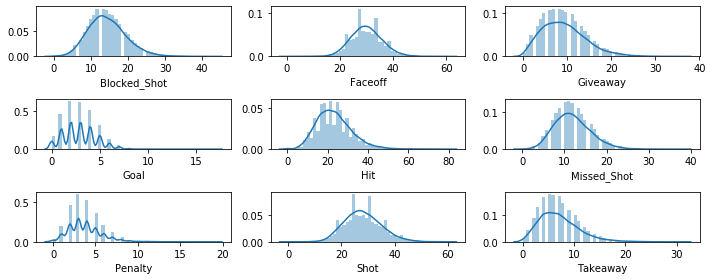

In [81]:
# To start Lets look at the actual event summary data
import seaborn as sns
import matplotlib.pyplot as plt

cols2 = []
for col in gameStats2.columns[6:-1]:
    if 'isFirst' not in col:
        cols2.append(col)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,4))
for i, column in enumerate(cols2):
    ax.set_title(column)
    sns.distplot(gameStats2[column],ax=axes[i//3,i%3])
    fig.tight_layout()  

#Looks like most of the data could be normally distributed, Goal and penalty seem a bit jumpy. Takeaway, Hit, Blocked_Shot
# and Giveaway seems to be skewed to the left

In [19]:
# Lets take a look at the isFirst columns, along with isHome. 
# I want to see what we can do with naive bayes algorithm.
cols = []
for col in gameStats2.columns[6:-1]:
    if 'isHome' in col or 'isFirst'in col:
        cols.append(col)

0.6908426819723454

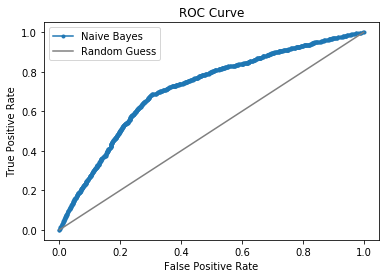

In [118]:
# We will use the sklearn packages to run the Bernoulli Naive Bayes algorithm
from sklearn.naive_bayes import BernoulliNB
# Library used to split test and training data
from sklearn.model_selection import train_test_split
# Used to show the roc curve for how well model is able to predict the outcome
from sklearn.metrics import roc_curve

features = gameStats2[cols].astype(int)
target = gameStats2.win.astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .25)

model = BernoulliNB()
model.fit(X_train, y_train)
y_bn_score = model.predict_proba(X_test)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_bn_score[:, 1])
plt.plot(fpr_bnb, tpr_bnb, marker='.', label='Naive Bayes')
# Used to create the Random Guess Curve
ident = [0.0, 1.0]
plt.plot(ident,ident, color= 'Gray',  label = 'Random Guess')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
model.score(X_test, y_test)

In [119]:
# I am wondering if we could get rid of some features that could help in the modeling.
# Here we will use the chi-square test for independence to see about dropping some of the columns 
from sklearn.feature_selection import chi2
chi_scores = chi2(features,target)

In [120]:
p_values = pd.Series(chi_scores[1],index = features.columns)
p_values.sort_values(ascending = False , inplace = True)

isFirst_Giveaway        0.97266
isFirst_Hit             0.95443
isFirst_Faceoff         0.59138
isFirst_Missed_Shot     0.09314
isFirst_Penalty         0.03431
isFirst_Takeaway        0.01747
isFirst_Blocked_Shot    0.00445
isFirst_Shot            0.00022
isHome                  0.00000
isFirst_Goal            0.00000
dtype: object


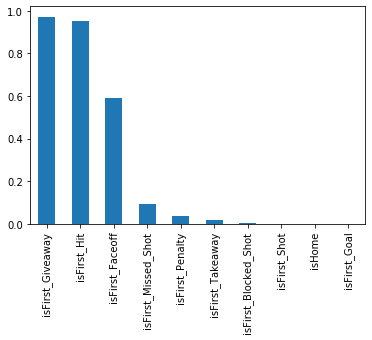

In [121]:
# Display p-values and a histogram with their results 
# We drop values with a p_value less than .01
p_v_ch = pd.DataFrame(p_values)
p_values.plot.bar()
# Get rid of scientific notation
print(p_v_ch.apply(lambda x: '%.5f' % x, axis=1))

In [122]:
new_col = p_values[p_values < .01].index

0.678058961648839


Text(0, 0.5, 'True Positive Rate')

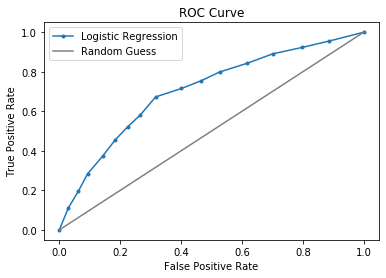

In [127]:
# Doesn't look it makes much difference changing the features
# We can look at using logistic regressions to see if we could get a better result
from sklearn.linear_model import LogisticRegression 

lr_scrs = []
# create and configure model
lr = LogisticRegression(solver='lbfgs')
features = gameStats2[new_col].astype(int)
target = gameStats2.win.astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .25)

lr.fit(X_train, y_train)
y_lr_score = lr.decision_function(X_test)
print(lr.score(X_test, y_test))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_score)
pyplot.plot(fpr_lr, tpr_lr, marker='.', label='Logistic Regression')
# Used to create the Random Guess Curve
ident = [0.0, 1.0]
plt.plot(ident,ident, color= 'Gray',  label = 'Random Guess')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Looks like not much have changed

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yPred))
print(classification_report(y_test, y_pred))